## Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are a type of machine learning algorithm used for classification and regression analysis. SVMs work by finding the optimal hyperplane that separates the data into different classes. The hyperplane is chosen to maximize the margin between the closest data points from each class, also known as the support vectors. This margin is the distance between the hyperplane and the closest data points from each class. 

We have decided to utilise this model and performed analysis based on the following steps:
1. Preparing data (obtain top 10 features, prep data to suit model)
2. Training SVM Model on full dataset (all 95 features)
3. Training SVM Model with only top 10 features
4. Evaluating the performance of each model by generating ROC and AUC, and comparing the classification reports of each model




**Conclusion**

Using SVM, we concluded that the model trained on the full dataset (Model 1) is more accurate (**94.55%**) compared to the model trained on the top 10 variables (Model 2) (**87.39%**). Plotting the ROC and obtaining the AUC, we obtained an AUC of **0.9794** for Model 1 and **0.9347** for Model 2. We can conclude that the SVM model is thus able to distinguish between positive and negative cases very well, and is an almost perfect classifier.

### 1. Preparing Data

##### a) Importing necessary libraries and load upsampled dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#for svm model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [16]:
# Load the data from CSV file
df = pd.read_csv("upsampled_bankruptcy.csv")

##### b) Obtain Top 10 Variables based on correlation with bankruptcy

In [17]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy
corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df[top_corr_features]
top_corr_features


[' Debt ratio %',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' ROA(C) before interest and depreciation before interest',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' Net Value Per Share (B)',
 ' Net Income to Total Assets']

##### c) Ensuring assumptions for SVM model are adhered to

One of the key assumptions of SVM is that input data is in numerical form. Therefore, we ensured that there were no non-numerical data in our dataset before training the model.

In [18]:
# select columns that are not numerical
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64', 'complex128'])

# print the non-numerical columns
if not non_numeric_cols.empty:
    print(f"The non-numerical columns are: {', '.join(non_numeric_cols.columns)}")
else:
    print("All columns are numerical.")

All columns are numerical.


### 2. Train SVM Model on full dataset

In [19]:

X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]
X = pd.get_dummies(X, drop_first=True) # encode categorical variables
X = StandardScaler().fit_transform(X) # scale numerical variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)




SVC(probability=True)

### 3. Train SVM Model with only top 10 features

In [20]:
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df["Bankrupt?"]

X2 = df_top10_upsampled
y2 = df["Bankrupt?"]
X2 = pd.get_dummies(X2, drop_first=True) # encode categorical variables
X2 = StandardScaler().fit_transform(X2) # scale numerical variables

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train an SVM model with RBF kernel
svm_model_top10 = SVC(kernel='rbf', probability=True)
svm_model_top10.fit(X_train2, y_train2)




SVC(probability=True)

### 4. Evaluating Performance of both models

              precision    recall  f1-score   support

           0     0.9767    0.9134    0.9440      1328
           1     0.9177    0.9779    0.9469      1312

    accuracy                         0.9455      2640
   macro avg     0.9472    0.9456    0.9454      2640
weighted avg     0.9474    0.9455    0.9454      2640



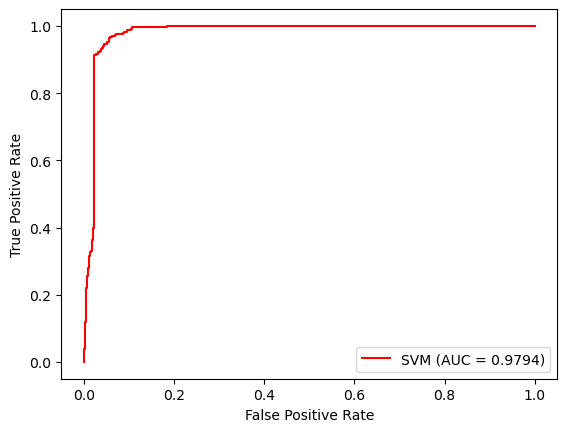

In [21]:
# Evaluate the model on the testing set
y_pred = svm_model.predict(X_test)
svm_report = classification_report(y_test, y_pred, digits=4)
print(svm_report)

# predict probabilities with SVM model for all variables
svm_probs = svm_model.decision_function(X_test)

# compare the predicted probabilities
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# plot the ROC curve
plt.plot(fpr_svm, tpr_svm, color='red', label='SVM (AUC = %0.4f)' % roc_auc_svm)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0     0.8996    0.8434    0.8706      1328
           1     0.8509    0.9047    0.8770      1312

    accuracy                         0.8739      2640
   macro avg     0.8752    0.8740    0.8738      2640
weighted avg     0.8754    0.8739    0.8738      2640



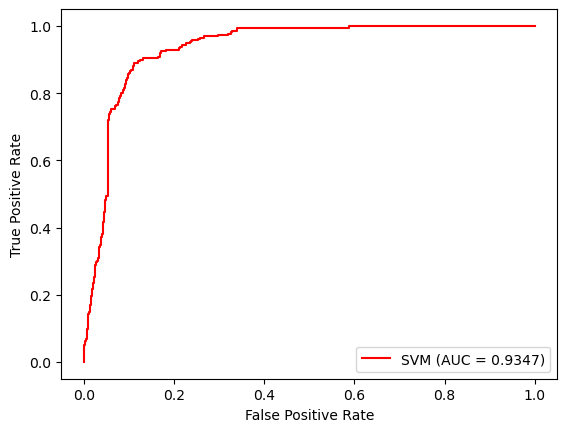

In [22]:
# Evaluate the model on the testing set
y_pred2 = svm_model_top10.predict(X_test2)
svm_report_top10 = classification_report(y_test2, y_pred2, digits=4)
print(svm_report_top10)

# predict probabilities with SVM model for all variables
svm_probs = svm_model_top10.decision_function(X_test2)

# compare the predicted probabilities
fpr_svm_top10, tpr_svm_top10, _ = roc_curve(y_test2, svm_probs)
roc_auc_svm_top10 = auc(fpr_svm_top10, tpr_svm_top10)


# plot the ROC curve
plt.plot(fpr_svm_top10, tpr_svm_top10, color='red', label='SVM (AUC = %0.4f)' % roc_auc_svm_top10)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

storing data for evaluation notebook

In [23]:

%store svm_report
%store fpr_svm
%store tpr_svm
%store svm_model
%store roc_auc_svm

%store svm_report_top10
%store fpr_svm_top10
%store tpr_svm_top10
%store svm_model_top10
%store roc_auc_svm_top10

Stored 'svm_report' (str)
Stored 'fpr_svm' (ndarray)
Stored 'tpr_svm' (ndarray)
Stored 'svm_model' (SVC)
Stored 'roc_auc_svm' (float64)
Stored 'svm_report_top10' (str)
Stored 'fpr_svm_top10' (ndarray)
Stored 'tpr_svm_top10' (ndarray)
Stored 'svm_model_top10' (SVC)
Stored 'roc_auc_svm_top10' (float64)
